In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #for ploting the data
from sklearn.preprocessing import OneHotEncoder #To encode the city values
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/college-placement/placement-dataset.csv


In [2]:
df=pd.read_csv("/kaggle/input/college-placement/placement-dataset.csv")
df.shape

(100, 4)

In [3]:
#to Check the null values in the data
df[["cgpa"]].mean()
df[["cgpa"]]=df[["cgpa"]].fillna(df[["cgpa"]].mean())
df.isnull().sum() #i filled up the null value of cgpa with the mean value

city         0
cgpa         0
iq           4
placement    0
dtype: int64

In [4]:
df[["iq"]].mean()
df[["iq"]]=df[["iq"]].fillna(df[["iq"]].mean())
df.isnull().sum() #i filled up the null value of iq with the mean value of iq.

city         0
cgpa         0
iq           0
placement    0
dtype: int64

In [5]:
df.isnull().sum()

city         0
cgpa         0
iq           0
placement    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       100 non-null    object 
 1   cgpa       100 non-null    float64
 2   iq         100 non-null    float64
 3   placement  100 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ KB


In [7]:
df.describe()

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.965217,117.916667,0.460000
std,1.116853,45.955988,0.500908
min,3.300000,1.000000,0.000000
25%,5.100000,90.750000,0.000000
50%,5.965217,120.500000,0.000000
75%,6.800000,143.000000,1.000000
max,8.500000,233.000000,1.000000


<Axes: xlabel='city', ylabel='cgpa'>

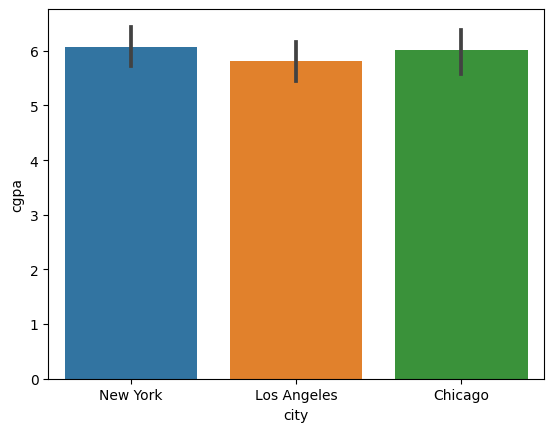

In [8]:
sns.barplot(data=df,x="city",y="cgpa") #New york student has high cgpa

<Axes: xlabel='city', ylabel='iq'>

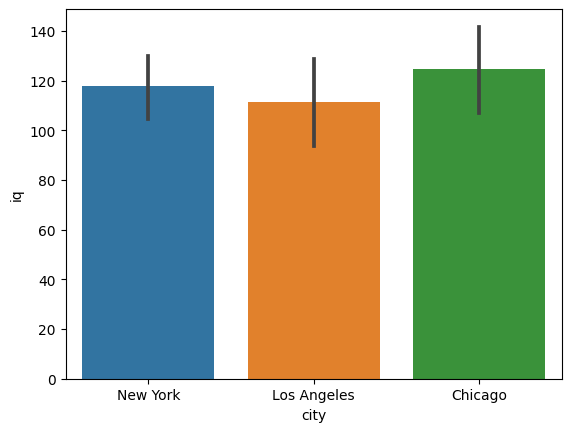

In [9]:
sns.barplot(data=df,x="city",y="iq") #chicago student has high iq.

In [10]:
df.sample(2)

,city,cgpa,iq,placement
67,Los Angeles,5.0,118.000000,0
71,Chicago,6.1,117.916667,1


In [11]:
df["city"].value_counts()

city
New York       34
Los Angeles    33
Chicago        33
Name: count, dtype: int64

In [12]:
df["cgpa"].max()

8.5

<Axes: xlabel='cgpa', ylabel='placement'>

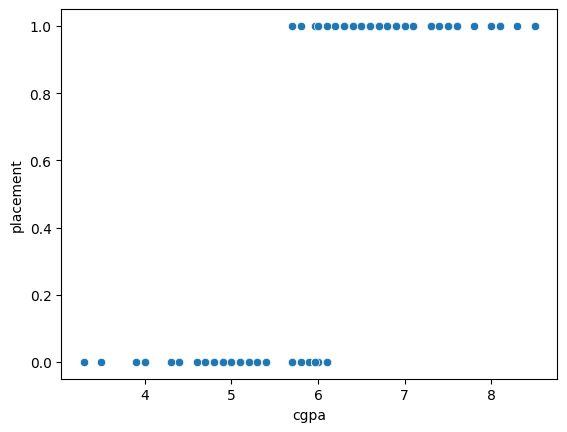

In [13]:
sns.scatterplot(data=df,x="cgpa",y="placement")

<Axes: >

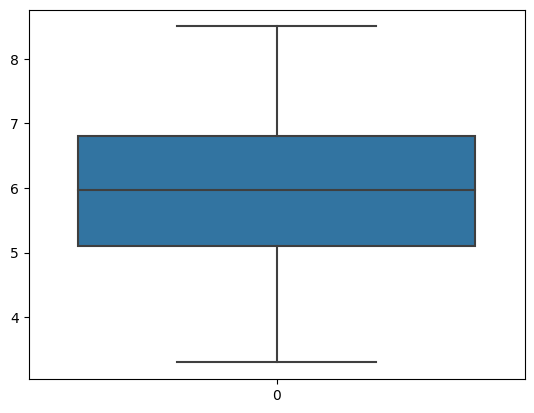

In [14]:
sns.boxplot(df["cgpa"]) # No outlier in the cgpa 

<Axes: >

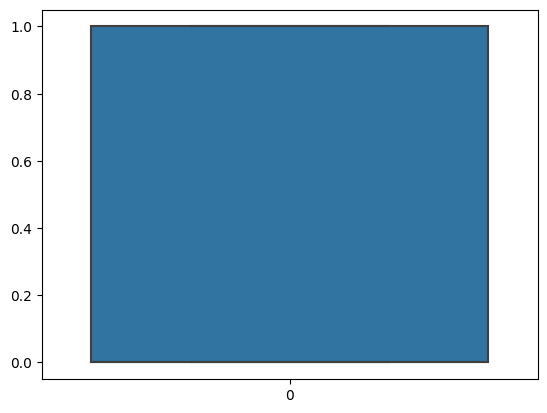

In [15]:
sns.boxplot(df["placement"]) # No outlier in the placement 

In [16]:
df.head(5)

,city,cgpa,iq,placement
0,New York,6.800000,123.0,1
1,Los Angeles,5.900000,106.0,0
2,Chicago,5.965217,121.0,0
3,New York,7.400000,132.0,1
4,Los Angeles,5.800000,142.0,0


In [17]:
Ohe=OneHotEncoder(drop="first",sparse=False)
df[["Los Angeles","new_york"]]=Ohe.fit_transform(df[["city"]]) #New York       34 ,Los Angeles    33
df.head(5)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,city,cgpa,iq,placement,Los Angeles,new_york
0,New York,6.800000,123.0,1,0.0,1.0
1,Los Angeles,5.900000,106.0,0,1.0,0.0
2,Chicago,5.965217,121.0,0,0.0,0.0
3,New York,7.400000,132.0,1,0.0,1.0
4,Los Angeles,5.800000,142.0,0,1.0,0.0


In [18]:
df.drop(columns=["city"],inplace=True)

In [19]:
x=df[["cgpa","iq","Los Angeles","new_york"]]
y=df[["placement"]]

In [20]:
pd.crosstab(df["iq"],df["placement"]).count() #placement ratio with iq

placement
0    70
1    70
dtype: int64

In [21]:
pd.crosstab(df["cgpa"],df["placement"]).count() #placement ratio 

placement
0    40
1    40
dtype: int64

<Axes: xlabel='placement', ylabel='iq'>

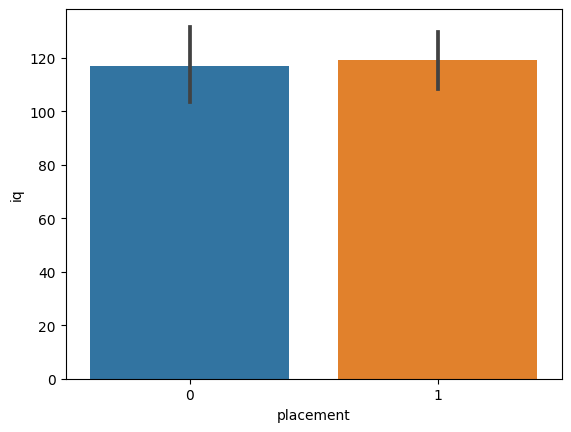

In [22]:
sns.barplot(data=df,x="placement",y="iq")

<Axes: xlabel='placement', ylabel='cgpa'>

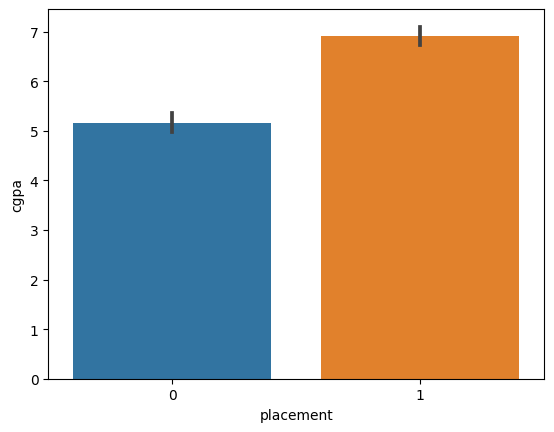

In [23]:
sns.barplot(data=df,x="placement",y="cgpa")

In [24]:
df.head(4)

,cgpa,iq,placement,Los Angeles,new_york
0,6.800000,123.0,1,0.0,1.0
1,5.900000,106.0,0,1.0,0.0
2,5.965217,121.0,0,0.0,0.0
3,7.400000,132.0,1,0.0,1.0


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.sample()

,cgpa,iq,Los Angeles,new_york
34,4.8,163.0,1.0,0.0


In [26]:
Lregression=LogisticRegression()

In [27]:
Lregression.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [28]:
#Now to check accuracy score:
y_prd=Lregression.predict(x_test)
accuracy_model=accuracy_score(y_prd,y_test)*100
print(f"My model has the accuracy of {accuracy_model}")

My model has the accuracy of 90.0


In [29]:
#Now make the prediction on the basis of train data
result=Lregression.predict([[8,20.0,1,0]])
if result[0]==0:
    print(f"Sorry you cant secure the placement:")
elif result[0]==1:
    print(f"Model Predict you can secure the placement.")

Model Predict you can secure the placement.


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
